
    
## Project description:
    
We're working as an analyst in the analytical department at Yandex.Afisha. We want to understandand and optimize marketing expenses.
    
#### We'll have:

* Server logs with data on Yandex.Afisha visits from June 2017 through May 2018
* Dump file with all orders for the period
* Marketing expenses statistics

#### We're going to study:

* How people use the product
* When they start to buy
* How much money each customer brings
* When they pay of


### Data description:
    
The visits table (server logs with data on website visits):

* Uid — user's unique identifier
* Device — user's device
* Start Ts — session start date and time
* End Ts — session end date and time
* Source Id — identifier of the ad source the user came from

All dates in this table are in YYYY-MM-DD format.

The orders table (data on orders):

* Uid — unique identifier of the user making an order
* Buy Ts — order date and time
* Revenue — Yandex.Afisha's revenue from the order

The costs table (data on marketing expenses):
* source_id — ad source identifier
* dt — date
* costs — expenses on this ad source on this day
    
    
    
### Project purpose:
Our ultimate purpose is to advise marketing experts how much money to invest and where.
    
### Instructions for completing the project
#### Step 1. Download the data and prepare it for analysis
* Storing the data on visits, orders, and expenses in variables. Optimize the data for analysis. Make sure each column contains the correct data type.
    
File paths:
1. /datasets/visits_log_us.csv. Download dataset
1. /datasets/orders_log_us.csv. Download dataset
1. /datasets/costs_us.csv. Download dataset

#### Step 2. Make reports and calculate metrics:
1. Product
* How many people use it every day, week, and month?
* How many sessions are there per day? (One user might have more than one session.)
* What is the length of each session?
* How often do users come back?

2. Sales
* When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)
* How many orders do they make during a given period of time?
* What is the average purchase size?
* How much money do they bring? (LTV)

3. Marketing
* How much money was spent? Overall/per source/over time
* How much did customer acquisition from each of the sources cost?
* How worthwhile where the investments? (ROI)
Plot graphs to display how these metrics differ for various devices and ad sources and how they change in time.

#### Step 3. Write a conclusion: 
    
* Advise marketing experts how much money to invest and where.
* What sources/platforms would you recommend? Back up your choice: what metrics did you focus on? Why? What conclusions did you draw after finding the metric values?

In [1]:
! pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from scipy import stats as st
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
from operator import attrgetter
import matplotlib.colors as mcolors


## Step 1. Download the data and prepare it for analysis

In [3]:
LOCAL_PATH_1 = 'visits_log_us.csv'
PLATFORM_PATH_1 = '/datasets/visits_log_us.csv'

LOCAL_PATH_2 = 'orders_log_us.csv'
PLATFORM_PATH_2 = '/datasets/orders_log_us.csv'

LOCAL_PATH_3 = 'costs_us.csv'
PLATFORM_PATH_3 = '/datasets/costs_us.csv'

    
try:
    visit = pd.read_csv(LOCAL_PATH_1,dtype={'Device': 'category'},parse_dates=['Start Ts', 'End Ts'])
except:
    visit = pd.read_csv(PLATFORM_PATH_1,dtype={'Device': 'category'},parse_dates=['Start Ts', 'End Ts'])
#-------------------------------------------------    
try:
    order = pd.read_csv(LOCAL_PATH_2,parse_dates=['Buy Ts'])
except:
    order = pd.read_csv(PLATFORM_PATH_2,parse_dates=['Buy Ts'])
#-----------------------------------------------------
try:
    cost = pd.read_csv(LOCAL_PATH_3,parse_dates=['dt'])
except:
    cost = pd.read_csv(PLATFORM_PATH_3,parse_dates=['dt'])
    
#-----------------------------------------------------
display(visit.head())
display(visit.info())
display(visit.isnull().sum())
#-----------------------------------
display(order.head())
display(order.info())
display(order.isnull().sum())
#--------------------------------------------
display(cost.head())
display(cost.info())
display(cost.isnull().sum())

#checking duplicates in dataframe
print('duplicate rows:',visit.duplicated().sum())
#---------------------------------------------------
print('duplicate rows:',order.duplicated().sum())
#-------------------------------------------------------------
print('duplicate rows:',cost.duplicated().sum())
#----------------------------------------------------



,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null category
End Ts       359400 non-null datetime64[ns]
Source Id    359400 non-null int64
Start Ts     359400 non-null datetime64[ns]
Uid          359400 non-null uint64
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


None

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null datetime64[ns]
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


None

Buy Ts     0
Revenue    0
Uid        0
dtype: int64

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null datetime64[ns]
costs        2542 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


None

source_id    0
dt           0
costs        0
dtype: int64

duplicate rows: 0
duplicate rows: 0
duplicate rows: 0




* Conclusion:
    
1. There have three dataframe visit_df,order_df and cost_df. The visit_df data set has 359400 rows and 5 columns, The order_df data set has 50415 rows and 3 columns and The cost_df data set has 2542 rows and 3 columns. 
    
1. There have no missing and duplicate values observed.Dataset have been optimized and all The data types are correct.


## Step 2. Make reports and calculate metrics:


    
## PRODUCT:

In [4]:
#How many people use it every day, week, and month?
visit['Start Ts'] = pd.to_datetime(visit['Start Ts'], format="%Y-%m-%d %H:%M")
visit['End Ts'] = pd.to_datetime(visit['End Ts'], format="%Y-%m-%d %H:%M")
visit['session_year']  = visit['Start Ts'].dt.year
visit['session_month'] = visit['Start Ts'].dt.month
visit['session_week']  = visit['Start Ts'].dt.week
visit['session_date'] = visit['Start Ts'].dt.date

dau_total = visit.groupby('session_date').agg({'Uid': 'nunique'}).mean()
wau_total = visit.groupby(['session_year', 'session_week']).agg({'Uid': 'nunique'}).mean()
mau_total = visit.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'}).mean()


print('Average Daily active user:',int(dau_total))
print('Average Weekly active user:',int(wau_total))
print('Average Monthly active user:',int(mau_total))
display(visit.head())

Average Daily active user: 907
Average Weekly active user: 5716
Average Monthly active user: 23228


,Device,End Ts,Source Id,Start Ts,Uid,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,12,52,2017-12-27


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning:

Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()



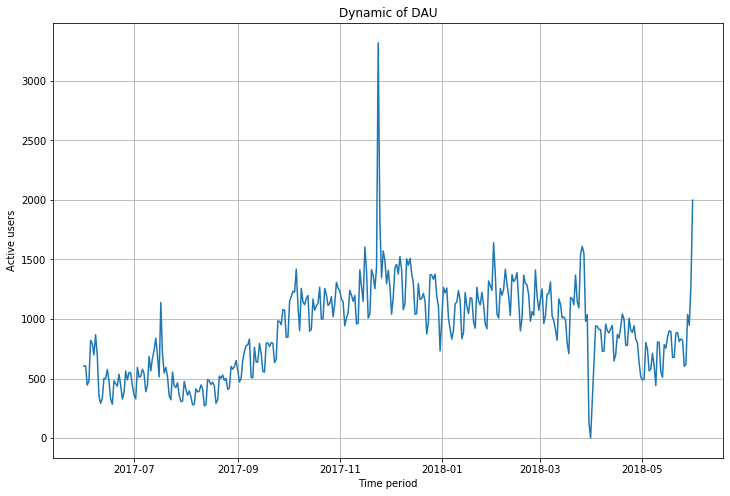

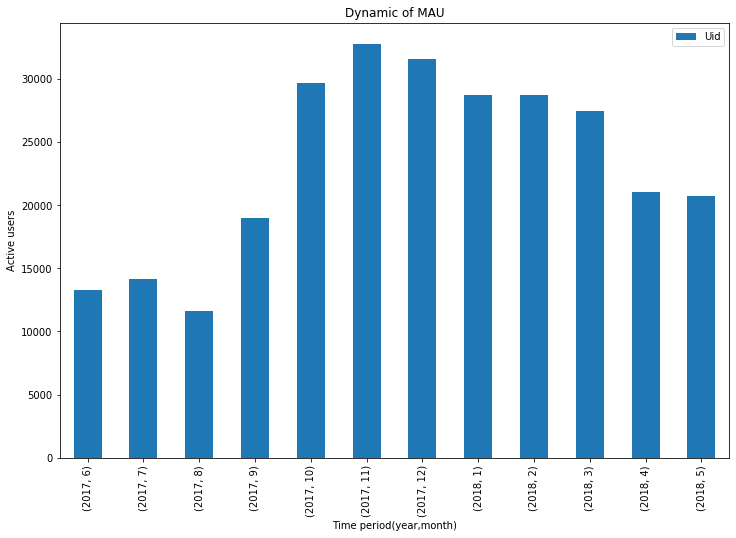

In [5]:
# Dynamics of Dau/Mau
#------------------------------------------------------------------
dau = visit.groupby('session_date').agg({'Uid': 'nunique'})
plt.figure(figsize=[12,8])
plt.grid(True)
plt.plot(dau['Uid'],label='Active users')
plt.title('Dynamic of DAU')
plt.xlabel("Time period")
plt.ylabel("Active users")
plt.show()

#-------------------------------------------------------

mau = visit.groupby(['session_year', 'session_month']).agg({'Uid': 'nunique'})
mau.plot(y='Uid', kind='bar', figsize=(12,8))
plt.xlabel("Time period(year,month)")
plt.ylabel("Active users")
plt.title('Dynamic of MAU')
plt.show()

import warnings
warnings.filterwarnings("ignore")



* Conclusion:
    
#### How many people use it every day, week, and month?
 
On average 907 people daily,5716 and 23228 people visits Yandex.Afisha server weekly and monthly respectively.Highest active users are observed in the month november and december in 2017 and lowest is observed in August,2017.

In [6]:
#How many sessions are there per day?

sessions_per_day = visit.groupby(['session_date']).agg({'Uid': ['count']})
sessions_per_day.columns = ['no_of_sessions']
print('Average session per day:',sessions_per_day.mean())

Average session per day: no_of_sessions    987.362637
dtype: float64


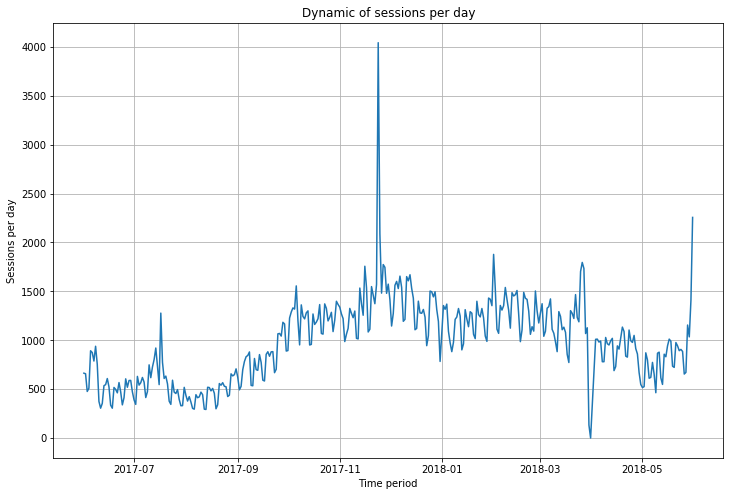

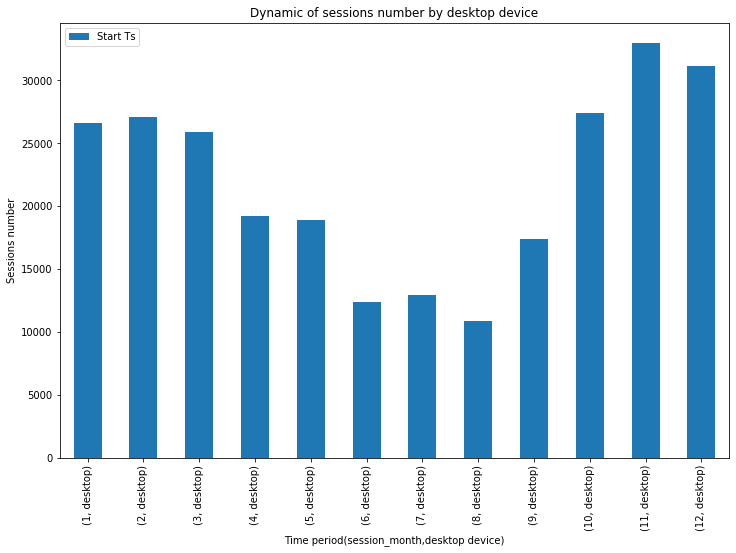

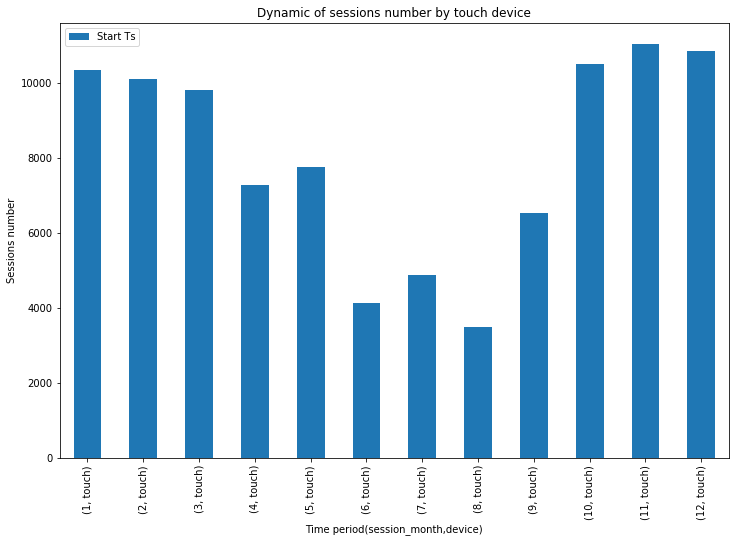

In [7]:
#Dynamic of sessions per day

plt.figure(figsize=[12,8])
plt.grid(True)
plt.plot(sessions_per_day['no_of_sessions'],label='Active users')
plt.title('Dynamic of sessions per day')
plt.xlabel("Time period")
plt.ylabel("Sessions per day")
plt.show()
#------------------------------------------------------------
#dynamics of sessions by desktop device
device_desktop = visit.query('Device == "desktop"')
device_desktop_group = device_desktop.groupby(['session_month','Device']).agg({'Start Ts': 'count'})
device_desktop_group.plot(y='Start Ts', kind='bar', figsize=(12,8))
plt.title('Dynamic of sessions number by desktop device')
plt.xlabel("Time period(session_month,desktop device)")
plt.ylabel("Sessions number")
plt.show()
#------------------------------------------------
#dynamics of sessions by touch device
device_touch = visit.query('Device == "touch"')
device_touch_group = device_touch.groupby(['session_month','Device']).agg({'Start Ts': 'count'})
device_touch_group.plot(y='Start Ts', kind='bar', figsize=(12,8))
plt.title('Dynamic of sessions number by touch device')
plt.xlabel("Time period(session_month,device)")
plt.ylabel("Sessions number")
plt.show()



* Conclusion:

#### How many sessions are there per day?

987 averge session have been observed.Highest number of session have been observed in dec,2017.Atleast one session per user have been occured everyday during the time period.Desktop device dominates more number of session than touch device duriing the time period and highest number of sessions is observed in the months of march-april-may 2018.

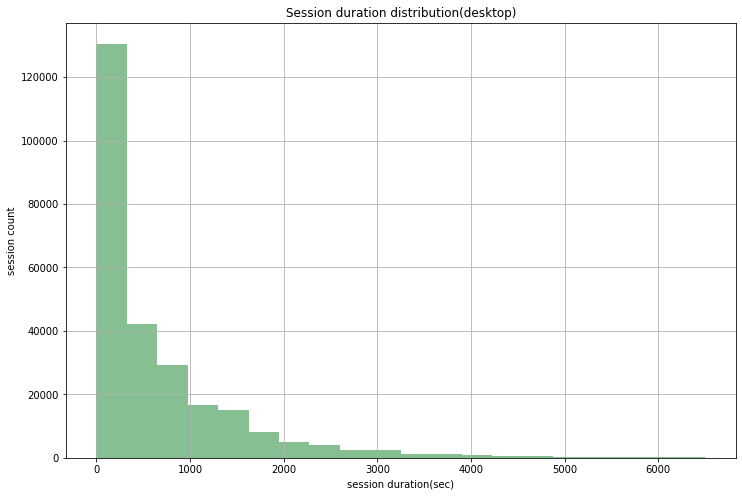

Average length session: 0    60
dtype: int64


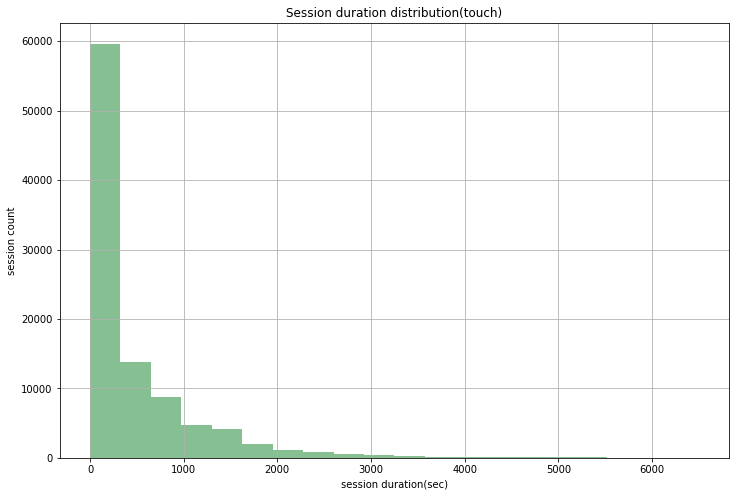

Average length session: 0    60
dtype: int64


In [8]:
#What is the length of each session?

device_desktop['session_duration_sec'] = (device_desktop['End Ts'] - device_desktop['Start Ts']).dt.seconds
device_desktop['session_duration_sec'].hist(bins=20,range=(0,6500),figsize=(12,8), color='#86bf91') 
plt.title('Session duration distribution(desktop)')
plt.xlabel("session duration(sec)")
plt.ylabel("session count")
plt.show()
print('Average length session:',device_desktop['session_duration_sec'].mode()) 
#-----------------------------------------------------
device_touch['session_duration_sec'] = (device_touch['End Ts'] - device_touch['Start Ts']).dt.seconds
device_touch['session_duration_sec'].hist(bins=20,range=(0,6500),figsize=(12,8), color='#86bf91') 
plt.title('Session duration distribution(touch)')
plt.xlabel("session duration(sec)")
plt.ylabel("session count")
plt.show()
print('Average length session:',device_touch['session_duration_sec'].mode()) 

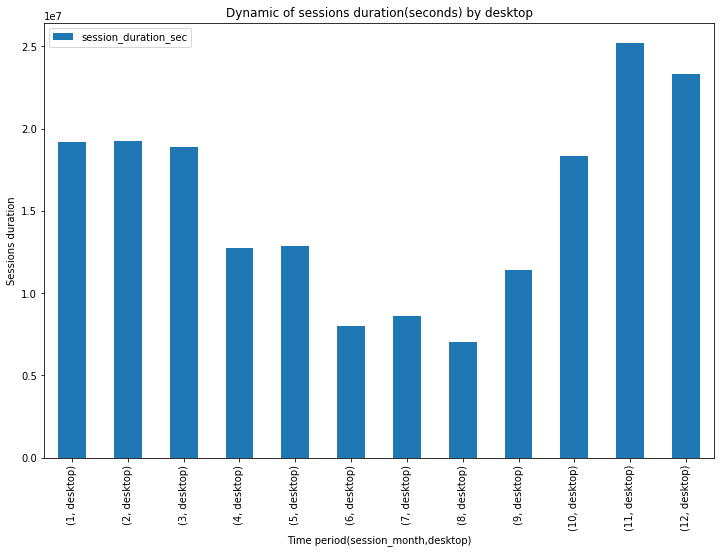

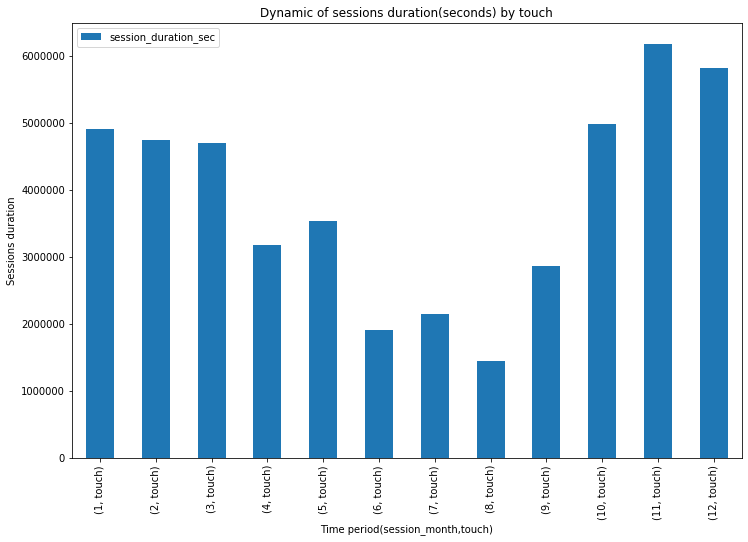

In [9]:
#dynamics of sessions duration by desktop device
session_duration_over_desktop = device_desktop.groupby(['session_month','Device']).agg({'session_duration_sec': 'sum'})
session_duration_over_desktop = session_duration_over_desktop.dropna()
session_duration_over_desktop.plot(y='session_duration_sec', kind='bar', figsize=(12,8))
plt.title('Dynamic of sessions duration(seconds) by desktop')
plt.xlabel("Time period(session_month,desktop)")
plt.ylabel("Sessions duration")
plt.show()
#---------------------------------------------
session_duration_over_touch = device_touch.groupby(['session_month','Device']).agg({'session_duration_sec': 'sum'})
session_duration_over_touch = session_duration_over_touch.dropna()
session_duration_over_touch.plot(y='session_duration_sec', kind='bar', figsize=(12,8))
plt.title('Dynamic of sessions duration(seconds) by touch')
plt.xlabel("Time period(session_month,touch)")
plt.ylabel("Sessions duration")
plt.show()



* Conclusion:

#### What is the length of each session?
    
The average session length is approx. 60 secs for both desktop and touch device.Desktop device dominates more session time than touch device.And many sessions took less than 1 sec which is suspicious.

In [10]:
#How often do user comeback?
visit.columns=visit.columns.str.lower()
visit.rename(columns = {'end ts':'end_ts','source id':'source_id','start ts':'start_ts'}, inplace = True)
print('number of unique customers:', visit['uid'].nunique())

number of unique customers: 228169


In [11]:
first_login_date = visit.groupby(['uid'])['start_ts'].min()
first_login_date.name = 'first_login_date'
visits = visit.join(first_login_date,on='uid')
 
visits['first_login_month'] = visits['first_login_date'].astype('datetime64[M]')
visits['login_month'] = visits['start_ts'].astype('datetime64[M]')
 
visits['cohort_lifetime'] = ((visits['login_month'] - visits['first_login_month']) / np.timedelta64(1, 'M')).round().astype(int)
 
visits.pivot_table(index='first_login_month',columns='login_month',values='uid',aggfunc='nunique',)
 
cohorts = (visits.groupby(['first_login_month', 'cohort_lifetime']).agg({'uid': 'nunique'}).reset_index())
print(cohorts.head(10))

  first_login_month  cohort_lifetime    uid
0        2017-06-01                0  13259
1        2017-06-01                1   1043
2        2017-06-01                2    713
3        2017-06-01                3    814
4        2017-06-01                4    909
5        2017-06-01                5    947
6        2017-06-01                6    809
7        2017-06-01                7    766
8        2017-06-01                8    694
9        2017-06-01                9    674


In [12]:
cohort_fin = cohorts.pivot(index='first_login_month', columns='cohort_lifetime', values='uid')
display(cohort_fin)

# access the first cohort values 
cohort_sizes = cohort_fin[0]
cohort_sizes[:10]

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_login_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,NaN
2017-08-01,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,NaN,NaN
2017-09-01,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,NaN,NaN,NaN
2017-10-01,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,NaN,NaN,NaN,NaN
2017-11-01,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,NaN,NaN,NaN,NaN,NaN
2017-12-01,25268.0,1410.0,960.0,786.0,512.0,481.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,22624.0,1351.0,890.0,565.0,458.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,22197.0,1267.0,565.0,446.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


first_login_month
2017-06-01    13259.0
2017-07-01    13140.0
2017-08-01    10181.0
2017-09-01    16704.0
2017-10-01    25977.0
2017-11-01    27248.0
2017-12-01    25268.0
2018-01-01    22624.0
2018-02-01    22197.0
2018-03-01    20589.0
Name: 0, dtype: float64

In [13]:
# calc retention by dividing all values by respective cohort_size
# axis=0 so that we divide along the row axis
# round to 3 and mutiply by 100 to get percentage for easy interpretation
retention = cohort_fin.divide(cohort_sizes, axis=0).round(3)
retention.index = retention.index.strftime('%Y-%m')
display(retention)

cohort_lifetime,0,1,2,3,4,5,6,7,8,9,10,11
2017-06,1.0,0.079,0.054,0.061,0.069,0.071,0.061,0.058,0.052,0.051,0.041,0.045
2017-07,1.0,0.056,0.051,0.056,0.058,0.048,0.045,0.046,0.039,0.029,0.027,NaN
2017-08,1.0,0.077,0.063,0.063,0.050,0.044,0.036,0.039,0.028,0.026,NaN,NaN
2017-09,1.0,0.085,0.069,0.051,0.039,0.038,0.036,0.024,0.023,NaN,NaN,NaN
2017-10,1.0,0.079,0.052,0.039,0.034,0.032,0.021,0.020,NaN,NaN,NaN,NaN
2017-11,1.0,0.078,0.044,0.039,0.034,0.023,0.022,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.056,0.038,0.031,0.020,0.019,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.060,0.039,0.025,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.057,0.025,0.020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03,1.0,0.042,0.027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


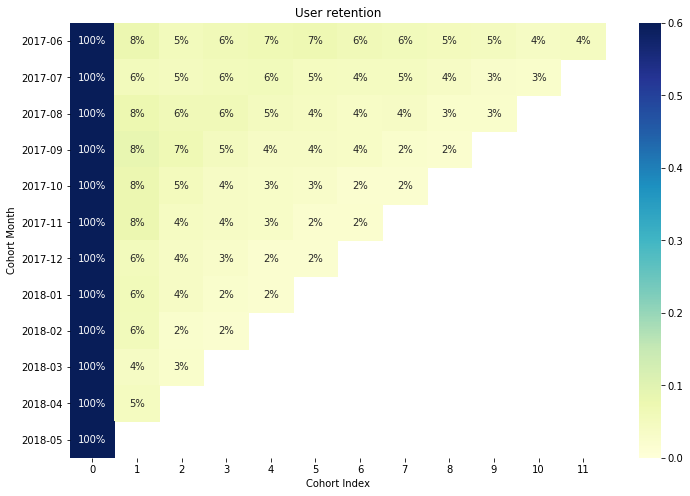

In [14]:
plt.figure(figsize=(12, 8))
sns.heatmap(retention, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.title('User retention')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()



* Conclusion:
    
#### How often they come back?
       
The retention dataframe represent Customer retained across Cohorts. We can read it as following:

1. Index value represents the Cohort
1. Columns represent the number of months since current Cohort
1. For example the value at index 2017-06 column 11 is 4% of customers from cohort 2017-06 were retained in 12th Month. 


    
## SALES:

13.90% of customers ordered more than once.


,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


Average order: 1.2672836294937437


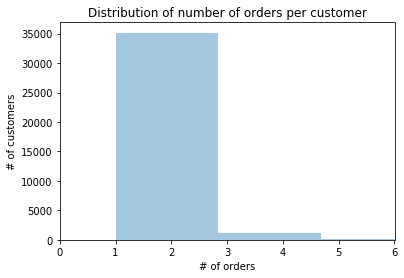

In [15]:
#When do people start buying?
order.describe().transpose()
#order_df=order_df.query('Revenue !=0')

n_orders = order.groupby(['Uid'])['Revenue'].nunique()
mult_orders_perc = np.sum(n_orders > 1) / order['Uid'].nunique()
print(f'{100 * mult_orders_perc:.2f}% of customers ordered more than once.')

ax = sns.distplot(n_orders, kde=False, hist=True)
ax.set(title='Distribution of number of orders per customer',xlabel='# of orders', ylabel='# of customers')
ax.set_xlim([0, 6])
display(order.head())
average_order = n_orders.mean()
print('Average order:',average_order)



In [16]:
#order.rename(columns = {'Buy Ts':'buy_ts','Revenue':'revenue','Uid':'uid'})
order['order_month'] = order['Buy Ts'].dt.to_period('M')
order['cohort'] = order.groupby('Uid')['Buy Ts'].transform('min').dt.to_period('M') 

df_cohort = order.groupby(['cohort', 'order_month']).agg(n_customers=('Uid', 'nunique')).reset_index(drop=False)
df_cohort['period_number'] = (df_cohort.order_month - df_cohort.cohort).apply(attrgetter('n'))
cohort_pivot = df_cohort.pivot_table(index = 'cohort',columns = 'period_number',values = 'n_customers')
cohort_size = cohort_pivot.iloc[:,0]
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
display(retention_matrix)

period_number,0,1,2,3,4,5,6,7,8,9,10,11
cohort,,,,,,,,,,,,
2017-06,1.0,0.030153,0.024716,0.026693,0.043500,0.033119,0.030648,0.023233,0.028670,0.022244,0.022244,0.026199
2017-07,1.0,0.027041,0.029641,0.033281,0.025481,0.019761,0.018721,0.020281,0.021841,0.011440,0.013521,NaN
2017-08,1.0,0.042336,0.038686,0.032117,0.029197,0.023358,0.021898,0.032117,0.013869,0.022628,NaN,NaN
2017-09,1.0,0.050368,0.038745,0.028671,0.020147,0.024797,0.025571,0.014336,0.016660,NaN,NaN,NaN
2017-10,1.0,0.047465,0.028341,0.021198,0.021429,0.016590,0.012903,0.015438,NaN,NaN,NaN,NaN
2017-11,1.0,0.054398,0.029405,0.025974,0.019848,0.011762,0.015192,NaN,NaN,NaN,NaN,NaN
2017-12,1.0,0.033311,0.023500,0.022131,0.011408,0.014374,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,1.0,0.033798,0.024607,0.012748,0.013341,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,1.0,0.032320,0.015886,0.010682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


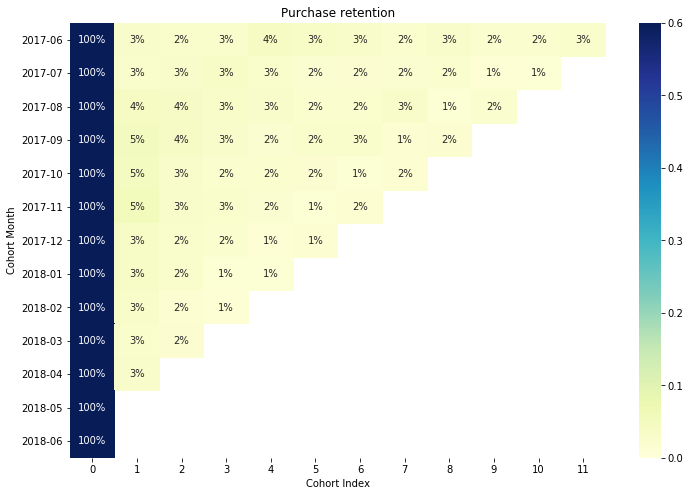

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(retention_matrix, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.title('Purchase retention')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()



* Conclusion:
    
#### When do people start buying?

In the image, we can see that there is a sharp drop-off in the second month (indexed as 1) already, on average around 97% of customers do not make any purchase in the second month. The first cohort (2017–06) seems to be an exception and performs surprisingly well as compared to the other ones. A year after the first purchase, there is a 3% retention. However, from data alone, that is very hard to accurately explain.Throughout the matrix, we can see fluctuations in retention over time. This might be caused by the characteristics of the business, where clients do periodic purchases, followed by periods of inactivity.

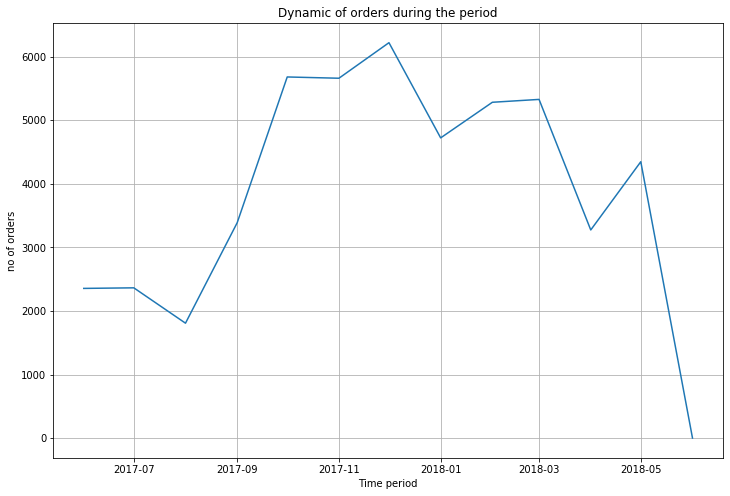

In [18]:
#How many orders do they make during a given period of time?

orders = pd.read_csv('/datasets/orders_log_us.csv')
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')
first_orders = orders.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']
orders_ = pd.merge(orders,first_orders, on='Uid')
cohorts = orders_.groupby(['order_month']).agg({'Revenue': 'count'}).reset_index()
cohorts.columns=['order_month','no_of_orders']

cohorts=cohorts.sort_values(by='order_month')
cohorts=cohorts.set_index('order_month')
plt.figure(figsize=[12,8])
plt.grid(True)
plt.plot(cohorts)
plt.title('Dynamic of orders during the period')
plt.xlabel("Time period")
plt.ylabel("no of orders")
plt.show()



* Conclusion:
    
#### How many orders do they make during a given period of time?

The highest number of orders have been place in Dec,2017 and lowest orders have been placed in August,2017.

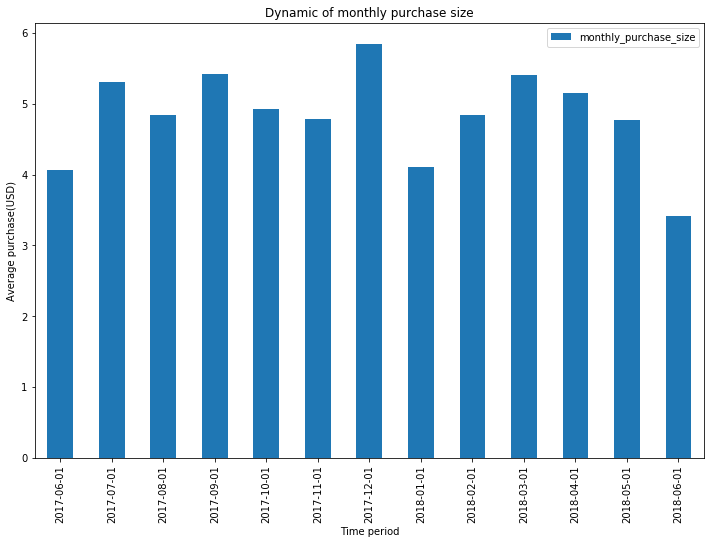

In [19]:
#What is the average purchase size?
purchase_size=  orders_.groupby(['order_month']).agg({'Revenue': 'mean'}).reset_index()
purchase_size.columns=['order_month','monthly_purchase_size']
purchase_size['order_month'] = pd.to_datetime(purchase_size['order_month']).dt.date
purchase_size=purchase_size.set_index('order_month')

purchase_size.plot(y='monthly_purchase_size', kind='bar', figsize=(12,8))
plt.title('Dynamic of monthly purchase size')
plt.xlabel("Time period")
plt.ylabel("Average purchase(USD)")
plt.show()

In [20]:
#How much money do they bring? (LTV)?
cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
display(cohort_sizes.head())
cohorts = orders_.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
display(cohorts.head()) 
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
display(report.head())

margin_rate = .5 # Assuming 50% margin rate

report['gp'] = report['Revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')
display(report.head())

report['ltv'] = report['gp'] / report['n_buyers']

output = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean').round()
display(output.fillna(''))

ltv_201706 = output.loc['2017-06-01'].sum()
display(ltv_201706) 

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


,first_order_month,order_month,Revenue
0,2017-06-01,2017-06-01,9557.49
1,2017-06-01,2017-07-01,981.82
2,2017-06-01,2017-08-01,885.34
3,2017-06-01,2017-09-01,1931.30
4,2017-06-01,2017-10-01,2068.58


,first_order_month,n_buyers,order_month,Revenue
0,2017-06-01,2023,2017-06-01,9557.49
1,2017-06-01,2023,2017-07-01,981.82
2,2017-06-01,2023,2017-08-01,885.34
3,2017-06-01,2023,2017-09-01,1931.30
4,2017-06-01,2023,2017-10-01,2068.58


,first_order_month,n_buyers,order_month,Revenue,gp,age
0,2017-06-01,2023,2017-06-01,9557.49,4778.745,0
1,2017-06-01,2023,2017-07-01,981.82,490.910,1
2,2017-06-01,2023,2017-08-01,885.34,442.670,2
3,2017-06-01,2023,2017-09-01,1931.30,965.650,3
4,2017-06-01,2023,2017-10-01,2068.58,1034.290,4


age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,2.0,0,0,0,1,0,0,0,0,0,0,0
2017-07-01,3.0,0,0,0,0,0,0,0,0,0,0,
2017-08-01,3.0,0,0,0,0,0,0,0,0,0,,
2017-09-01,3.0,1,0,2,0,0,0,0,0,,,
2017-10-01,3.0,0,0,0,0,0,0,0,,,,
2017-11-01,3.0,0,0,0,0,0,0,,,,,
2017-12-01,2.0,0,0,1,0,0,,,,,,
2018-01-01,2.0,0,0,0,0,,,,,,,
2018-02-01,2.0,0,0,0,,,,,,,,


3.0



* Conclusion:
    
#### How much money do they bring? (LTV)?
On average, each customer from the first cohort brought USD 3 in revenue over their twelve-month liftetime.


    
## MARKETING:

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


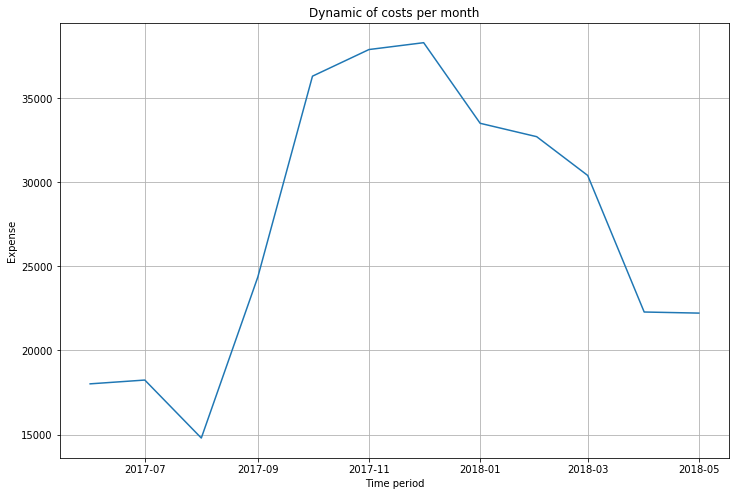

In [21]:
#How much money was spent? Overall/per source/over time
display(cost.head())
cost['dt'] = cost['dt'].astype('datetime64[M]') 
cost = cost.groupby(['dt']).agg({'costs': 'sum'})
plt.figure(figsize=[12,8])
plt.grid(True)
plt.plot(cost)
plt.title('Dynamic of costs per month')
plt.xlabel("Time period")
plt.ylabel("Expense")
plt.show()



* Conclusion:
    
#### How much money was spent? Overall/per source/over time
The highest expense was observed in Dec,2017 and lowest expense is in August,2017. 


In [22]:
#How much did customer acquisition from each of the sources cost?
cost=cost.reset_index()
# getting the necessary cohort
cohort_201706 = report[report['first_order_month'] == '2017-06-01']

# calculating costs for the cohort month
costs_201706 = cost[cost['dt'] == '2017-06-01']['costs'].sum()

n_buyers_201706 = cohort_201706['n_buyers'][0]
cac_201706 = costs_201706 / n_buyers_201706
ltv_201706   = output.loc['2017-06-01'].sum()

print('CAC =', cac_201706)
print('LTV =', ltv_201706) 

CAC = 8.905091448344047
LTV = 3.0




* Conclusion:
    
#### How much did customer acquisition from each of the sources cost?

Acquiring each customer cost the company an average of USD 8.9, while each customer brought in USD 3. So investment in customer acquisition is not paid off and even led to loss.

In [23]:
#How worthwhile where the investments? (ROI)

# calculating the costs per month
monthly_costs = cost.groupby('dt').sum()

report_ = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='dt')
report_['cac'] = report_['costs'] / report_['n_buyers']

report_['romi'] = report_['ltv'] / report_['cac']
output_2 = report_.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

output_2.cumsum(axis=1).round(2) 
output_2.index = output_2.index.strftime('%Y-%m')
display(output_2)

age,0,1,2,3,4,5,6,7,8,9,10,11
2017-06,0.265265,0.027250,0.024572,0.053603,0.057413,0.041297,0.053365,0.032655,0.031062,0.034014,0.032075,0.014422
2017-07,0.316811,0.017670,0.032868,0.018922,0.009319,0.008226,0.006336,0.007476,0.008499,0.007756,0.008206,NaN
2017-08,0.244373,0.021860,0.021234,0.018121,0.022881,0.013132,0.009757,0.018757,0.013533,0.008706,NaN,NaN
2017-09,0.298916,0.059184,0.027587,0.210545,0.021212,0.034267,0.037155,0.012876,0.009744,NaN,NaN,NaN
2017-10,0.298933,0.032008,0.011434,0.009388,0.009054,0.007191,0.005067,0.006898,NaN,NaN,NaN,NaN
2017-11,0.277466,0.021490,0.010742,0.017491,0.007967,0.002900,0.006186,NaN,NaN,NaN,NaN,NaN
2017-12,0.271007,0.014892,0.052912,0.060930,0.017898,0.019335,NaN,NaN,NaN,NaN,NaN,NaN
2018-01,0.208086,0.014831,0.015310,0.007184,0.003155,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02,0.231903,0.015524,0.004380,0.004136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03,0.281035,0.017476,0.018327,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


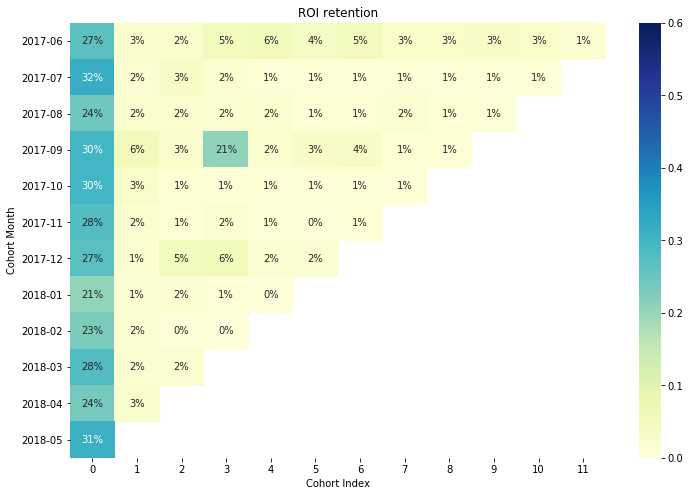

In [24]:
plt.figure(figsize=(12, 8))
sns.heatmap(output_2, annot=True, fmt= '.0%',cmap='YlGnBu', vmin = 0.0 , vmax = 0.6)
plt.title('ROI retention')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()



* Conclusion:
    
#### How worthwhile where the investments? (ROI)

In general,every cohort had not paid off.The ROI at index 2017-06 column 11 is 1% of customers from cohort 2017-06 were retained in 12th Month.



## Overall conclusion


## Step 1 :  Download the data and prepare it for analysis
    
* In the beginning, the datasets have been opened and the general information have been analyzed .There have three dataframe visit_df,order_df and cost_df. The visit_df data set has 359400 rows and 5 columns, The order_df data set has 50415 rows and 3 columns and The cost_df data set has 2542 rows and 3 columns. There have no missing and duplicate values observed.Dataset have been optimized and all The data types are correct.
    
## Step 2: Make reports and calculate metrics:
    
### PRODUCT:

* On average 907 people daily,5716 and 23228 people visits Yandex.Afisha server weekly and monthly respectively.Highest active users are observed in the month november and december in 2017 and lowest is observed in August,2017.
    
* 987 averge session have been observed.Highest number of session have been observed in dec,2017.Atleast one session per user have been occured everyday during the time period.Desktop device dominates more number of session than touch device duriing the time period and highest number of sessions is observed in the months of march-april-may 2018.
    
* The average session length is approx. 60 secs.Desktop device dominates more session time than touch device.

* The value at index 2017-06 column 11 is 4% of customers from cohort 2017-06 were retained in 12th Month.
    
### SALES:

* We saw that there is a sharp drop-off in the second month (indexed as 1) already, on average around 97% of customers do not make any purchase in the second month. The first cohort (2017–06) seems to be an exception and performs surprisingly well as compared to the other ones. A year after the first purchase, there is a 3% retention. However, from data alone, that is very hard to accurately explain.Throughout the matrix, we can see fluctuations in retention over time. This might be caused by the characteristics of the business, where clients do periodic purchases, followed by periods of inactivity.
    
* The highest number of orders have been place in Dec,2017 and lowest orders have been placed in August,2017.
    
* On average, each customer from the first cohort brought USD 3 in revenue over their twelve-month liftetime.
    
### MARKETING:
    
* The highest expense was observed in Dec,2017 and lowest expense is in August,2017.
    
* Acquiring each customer cost the company an average of USD 8.9, while each customer brought in USD 3. So investment in customer acquisition is not paid off and even led to loss.
    
* In general,every cohort had not paid off.The ROI at index 2017-06 column 11 is 1% of customers from cohort 2017-06 were retained in 12th Month.
    

    
## Suggestion to earn more revenue:
   
* As acquiring each customer cost the company an average of USD 8.9, while each customer brought in USD 3.So, we have to invest money not more USD 3 per user to avoid loss.
    
* As desktop device dominates more session time than touch device, i recommend marketing invest more on desktop devices.
    
* AS we saw that there is a sharp drop-off in the second month (indexed as 1) already, on average around 97% of customers do not make any purchase in the second month,We could investigate the purchase/checkout page in the website.
    
* The marketing expense is not mentioned in this project.Also the expense is not declared which one is variable and which one is fixed.If we had this info,we could build Per-Sale Economics model which is more convinient to optimize marketing expense.

